In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/Cleaned Superstore - Orders.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ship Date > Order Date
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,True
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,True
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,True
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,True
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9470,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,True
9471,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,True
9472,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,True
9473,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9475 entries, 0 to 9474
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Row ID                  9475 non-null   int64  
 1   Order ID                9475 non-null   object 
 2   Order Date              9475 non-null   object 
 3   Ship Date               9475 non-null   object 
 4   Ship Mode               9475 non-null   object 
 5   Customer ID             9475 non-null   object 
 6   Customer Name           9475 non-null   object 
 7   Segment                 9475 non-null   object 
 8   Country                 9475 non-null   object 
 9   City                    9475 non-null   object 
 10  State                   9475 non-null   object 
 11  Postal Code             9475 non-null   int64  
 12  Region                  9475 non-null   object 
 13  Product ID              9475 non-null   object 
 14  Category                9475 non-null   

In [ ]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9475.000000,9475.000000,9475.000000,9475.000000,9475.000000,9475.000000
mean,4990.402850,55135.723483,229.265770,3.800422,0.156416,28.602750
std,2895.404472,32108.168612,626.501785,2.229535,0.206847,234.417186
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2481.500000,22552.500000,17.310000,2.000000,0.000000,1.712550
50%,4984.000000,57103.000000,54.336000,3.000000,0.200000,8.674400
75%,7499.500000,90008.000000,209.880000,5.000000,0.200000,29.293850
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.keys()

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Ship Date > Order Date'],
      dtype='object')

In [ ]:
dtypes = df.dtypes
dtypes

Row ID                      int64
Order ID                   object
Order Date                 object
Ship Date                  object
Ship Mode                  object
Customer ID                object
Customer Name              object
Segment                    object
Country                    object
City                       object
State                      object
Postal Code                 int64
Region                     object
Product ID                 object
Category                   object
Sub-Category               object
Product Name               object
Sales                     float64
Quantity                    int64
Discount                  float64
Profit                    float64
Ship Date > Order Date       bool
dtype: object

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
# Ensure date columns are converted to datetime if not already done
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create a 'Month' column for monthly aggregation
df['Month'] = df['Order Date'].dt.to_period('M')

# Check for unique values in 'Month' to ensure it's populated
print("Unique months:", df['Month'].unique())

Unique months: <PeriodArray>
['2016-11', '2016-06', '2015-10', '2014-06', '2017-04', '2016-12', '2015-11',
 '2014-11', '2014-05', '2014-08', '2017-07', '2015-09', '2016-01', '2017-10',
 '2015-12', '2017-09', '2016-07', '2016-03', '2014-10', '2015-04', '2014-12',
 '2016-09', '2017-12', '2017-11', '2017-05', '2016-04', '2015-01', '2017-06',
 '2016-08', '2015-03', '2014-09', '2017-02', '2016-10', '2015-05', '2014-03',
 '2016-05', '2015-02', '2015-08', '2015-07', '2014-07', '2015-06', '2014-04',
 '2017-03', '2017-08', '2017-01', '2014-02', '2014-01', '2016-02']
Length: 48, dtype: period[M]


## **1) Which product categories have the highest total sales in the "Superstore" dataset?**

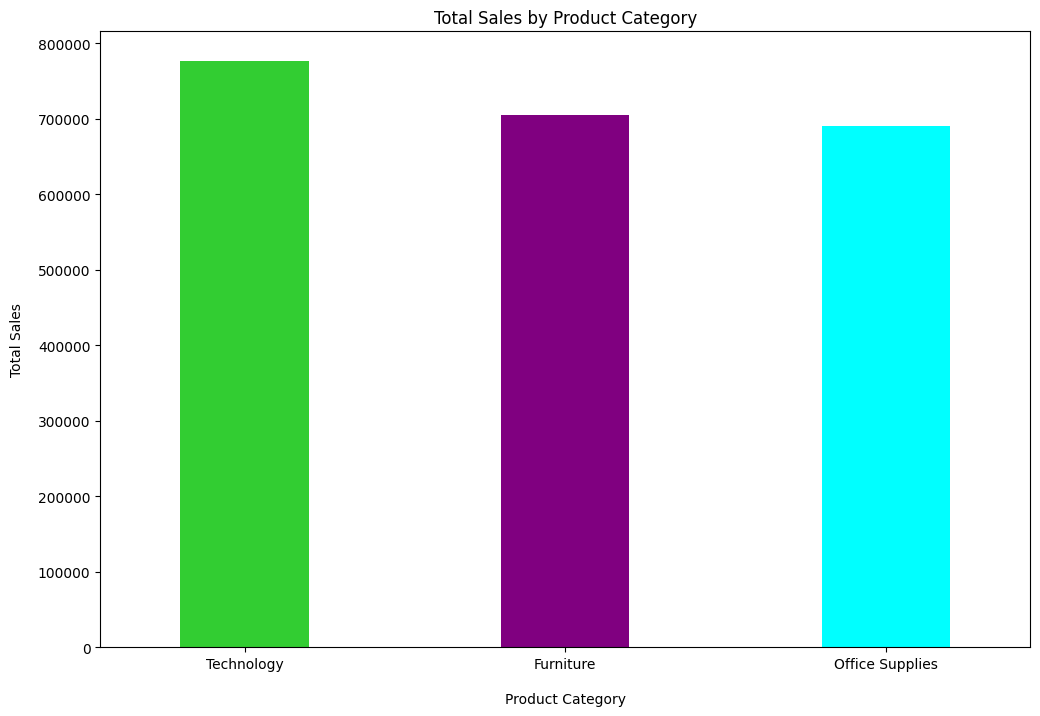

In [ ]:
plt.figure(figsize=(12, 8))
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', title='Total Sales by Product Category',color = ['Limegreen' , 'Purple' , 'Aqua'] , width = 0.4)
plt.ylabel('Total Sales',labelpad=10)
plt.xlabel('Product Category',labelpad=15)
plt.xticks(rotation=0)

plt.savefig('profit_impact_by_state.png', dpi=600)

plt.show()

## **2) How do the monthly sales amounts change over the course of a year?**

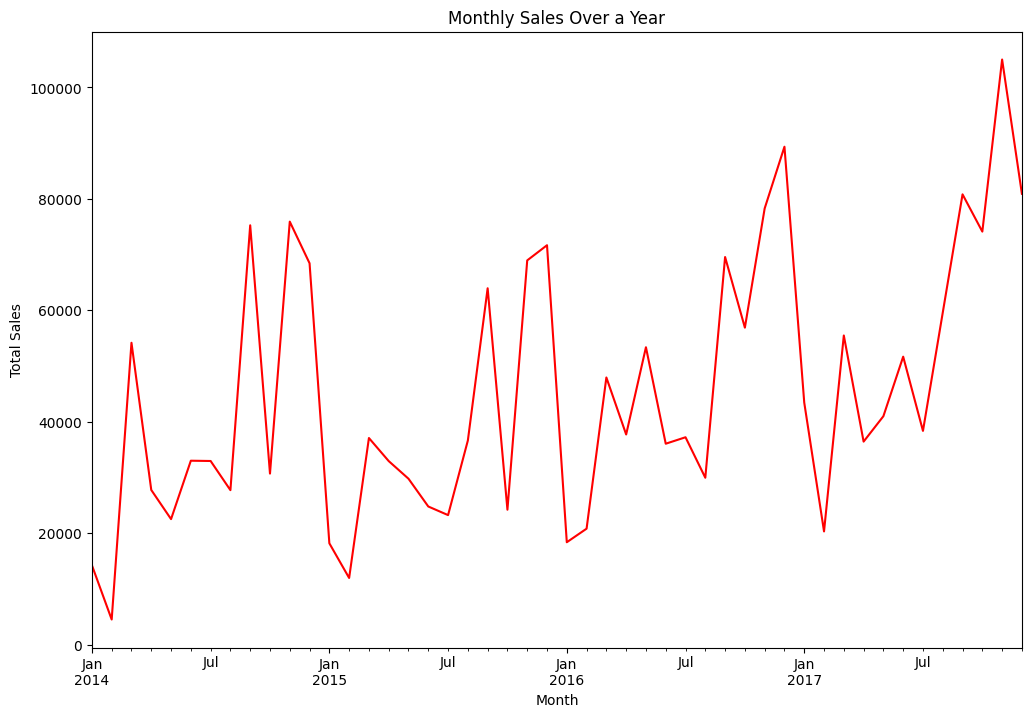

In [ ]:
plt.figure(figsize=(12, 8))
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Over a Year',color = 'red')
plt.ylabel('Total Sales')
plt.savefig('2.png', dpi=600)
plt.show()

## **3) How is the total sales amount distributed among different product categories?**

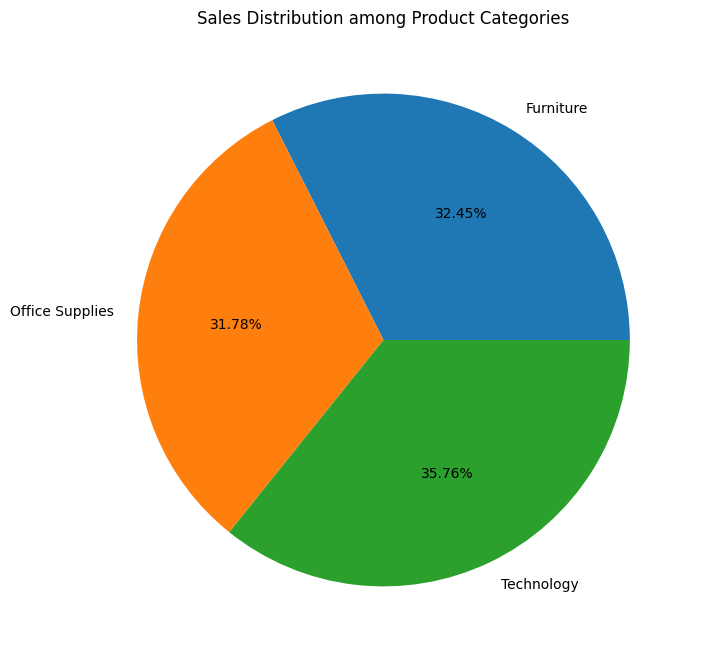

In [ ]:
# Create a pie chart to show the sales distribution among product categories
plt.figure(figsize=(12, 8))
category_sales_pie = df.groupby('Category')['Sales'].sum()

# Plot the pie chart with autopct showing percentages
category_sales_pie.plot(kind='pie', autopct='%0.2f%%', title='Sales Distribution among Product Categories')

# Remove the y-axis label
plt.ylabel('')  # Clear the default y-axis label
plt.savefig('3.png', dpi=600)
plt.show()

## **4) Can we analyze the sales performance of individual customers over time?**

<ipython-input-56-cc6006f20002>:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='YearMonth', y='Sales', data=limited_data, scale='width')


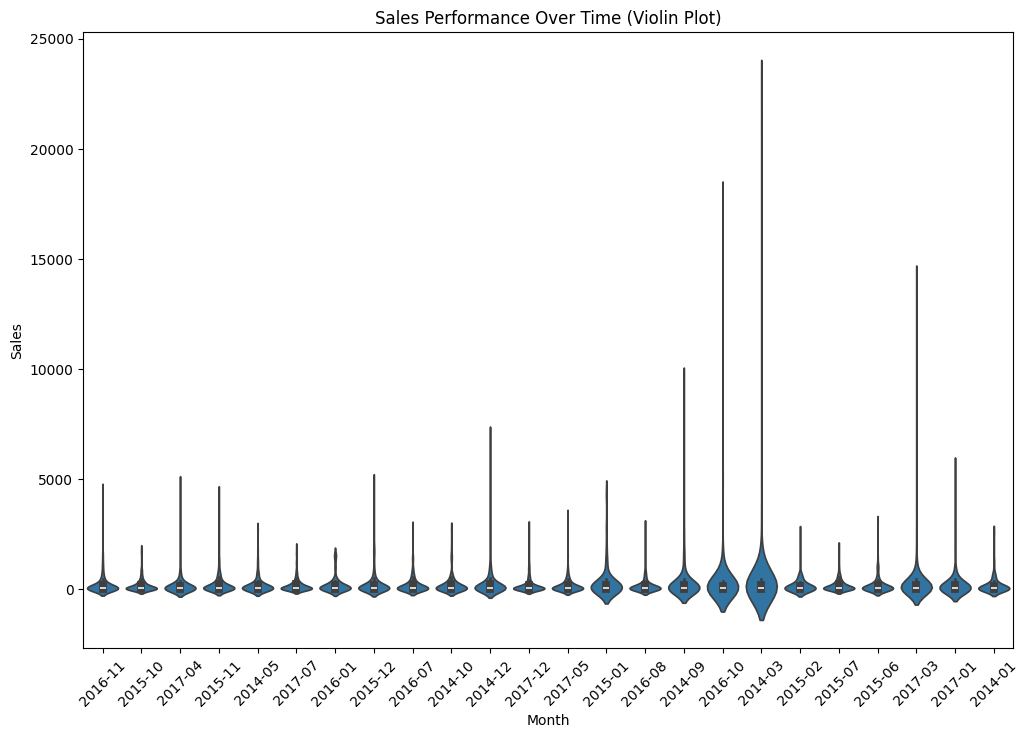

In [ ]:
# Limit to every other month to reduce label overlap
limited_data = df[df['YearMonth'].isin(df['YearMonth'].unique()[::2])]

plt.figure(figsize=(12, 8))
sns.violinplot(x='YearMonth', y='Sales', data=limited_data, scale='width')
plt.title('Sales Performance Over Time (Violin Plot)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlapping
plt.savefig('4.png', dpi=600)
plt.show()

## **5) How do sales vary based on different days of the week and product categories?**

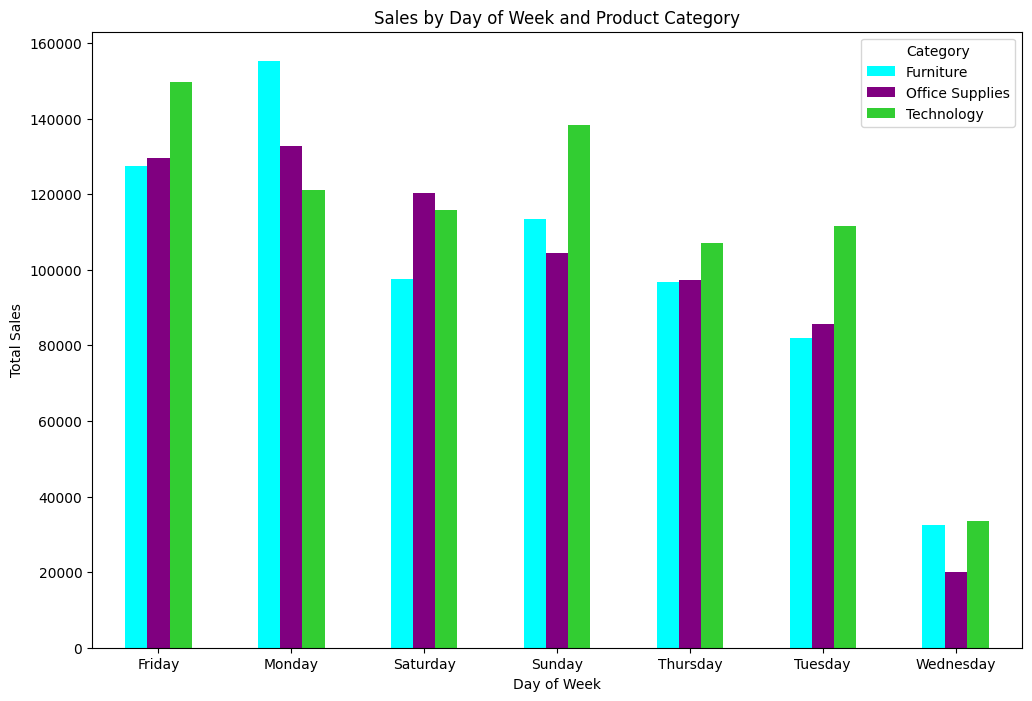

In [ ]:
df['Day of Week'] = df['Order Date'].dt.day_name()
sales_by_day_category = df.groupby(['Day of Week', 'Category'])['Sales'].sum().unstack()
sales_by_day_category.plot(kind='bar', title='Sales by Day of Week and Product Category', figsize=(12, 8), color = ["Aqua" ,"Purple","Limegreen"])
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

plt.savefig('5.png', dpi=600)
plt.show()

## **6) Can we visualise the sales growth of different product categories over time?**

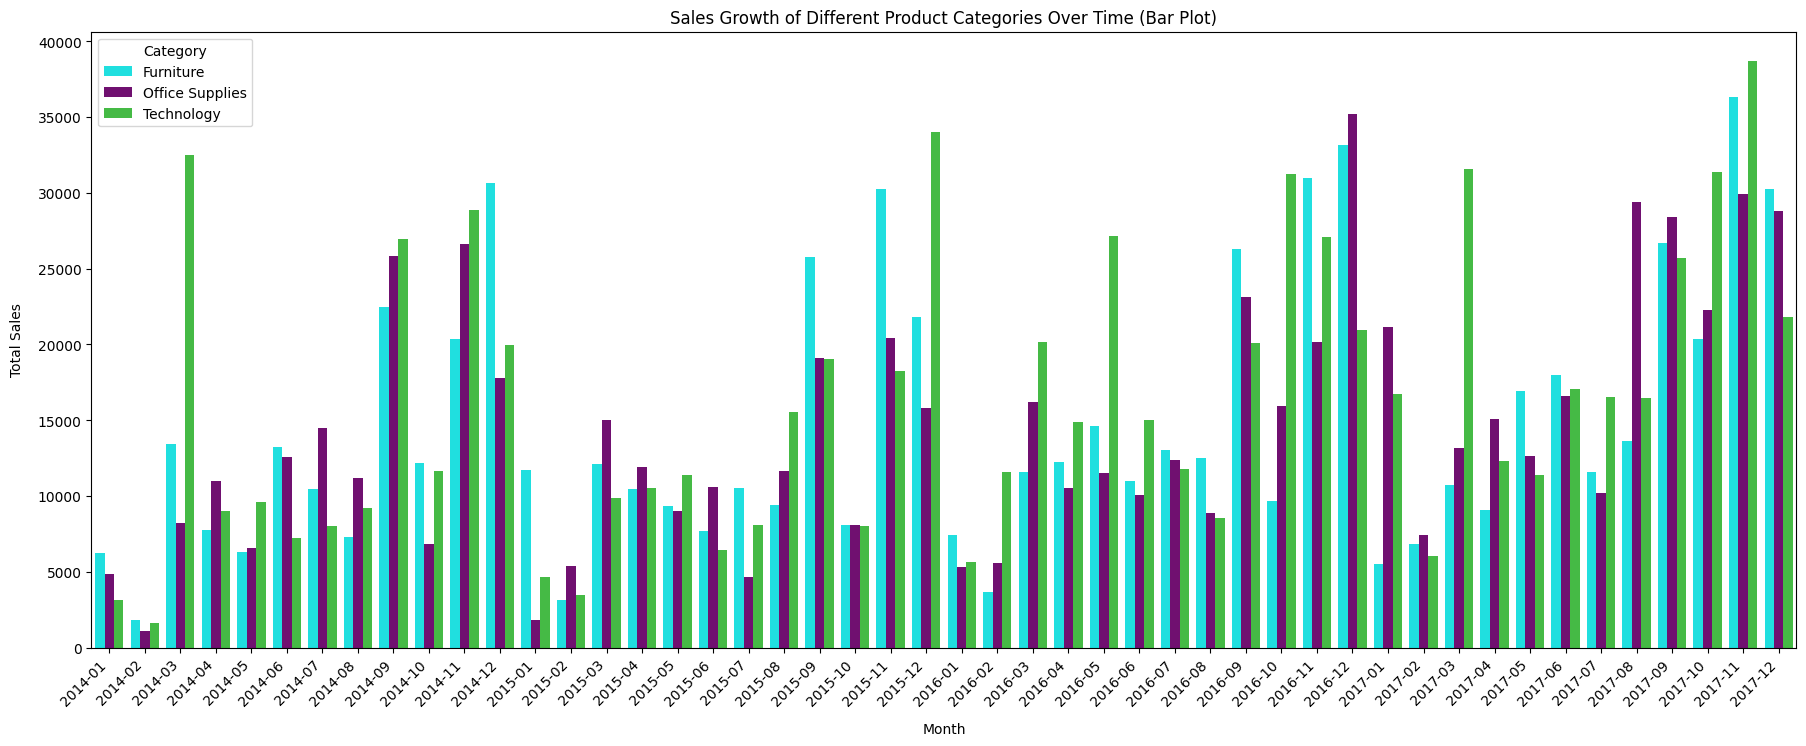

In [ ]:
plt.figure(figsize=(22, 8))  # Larger figure size to allow more space between elements
c_color = ["Aqua" ,"Purple","Limegreen"]

sns.barplot(x='Month', y='Sales', hue='Category', data=category_monthly_sales, palette=c_color, width=0.8)
plt.title('Sales Growth of Different Product Categories Over Time (Bar Plot)')
plt.xlabel('Month',labelpad=10)
plt.ylabel('Total Sales',labelpad=10)
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better spacing
plt.savefig('6.png', dpi=600)
plt.show()

## **7) How does the sales distribution vary across different regions in the "Superstore" dataset?**

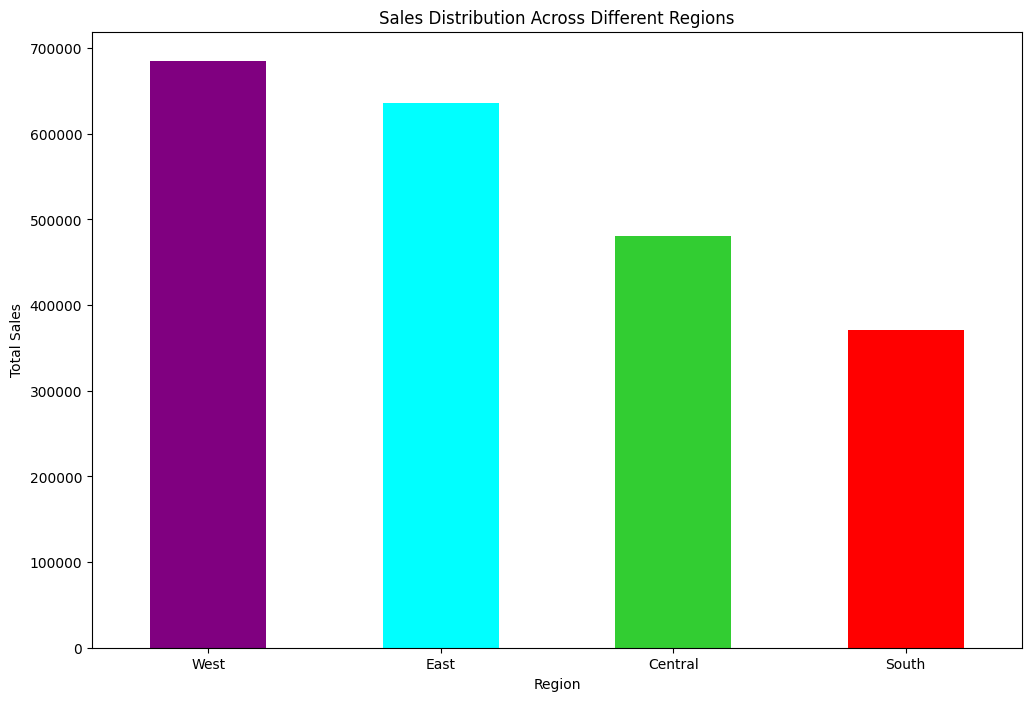

In [ ]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title='Sales Distribution Across Different Regions', figsize=(12, 8),color = ["Purple", "Aqua" ,"Limegreen","Red"])
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.savefig('7.png', dpi=600)
plt.show()

## **8) Can we visualise the composition of profits across various subcategories within different customer segments?**

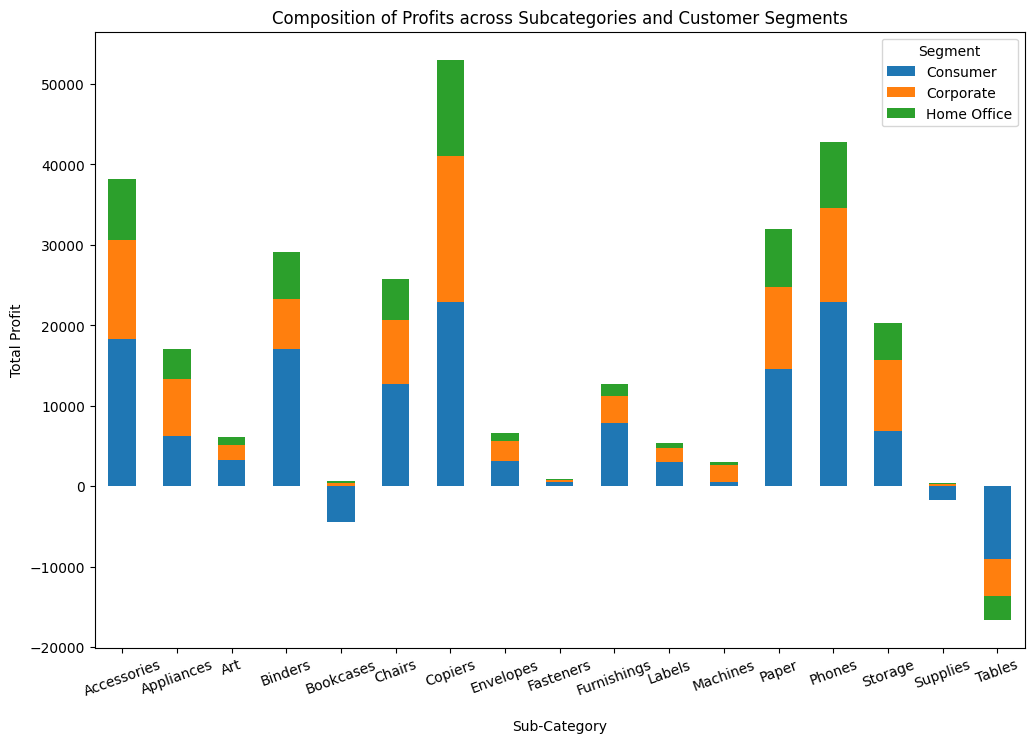

In [ ]:
profit_by_subcategory_segment = df.groupby(['Sub-Category', 'Segment'])['Profit'].sum().unstack()
profit_by_subcategory_segment.plot(kind='bar', stacked=True, title='Composition of Profits across Subcategories and Customer Segments', figsize=(12, 8))
plt.ylabel('Total Profit')
plt.xlabel('Sub-Category',labelpad=15)
plt.xticks(rotation=20)
plt.savefig('8.png', dpi=600)
plt.show()

## **9) What is the percentage contribution of each region to the overall sales?**

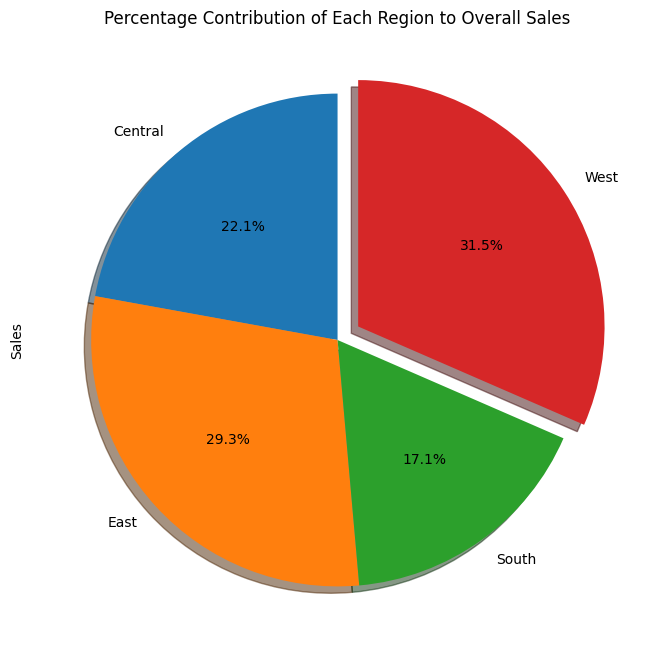

In [ ]:
import matplotlib.pyplot as plt

# Group sales by region
region_sales = df.groupby('Region')['Sales'].sum()

# Find the index of the region with the highest sales (for example, to explode it)
highest_sales_region = region_sales.idxmax()  # Get the region with the highest sales
explode = [0.1 if region == highest_sales_region else 0 for region in region_sales.index]  # Explode this region

# Create the pie chart with one exploded part
plt.figure(figsize=(8, 8))
region_sales.plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=explode,  # Explode only the desired region
    shadow=True,
    startangle=90,
    title='Percentage Contribution of Each Region to Overall Sales'
)
plt.savefig('9.png', dpi=600)
plt.show()

## **10) Can we visualise the profit margins associated with different shipping modes and customer segments?**

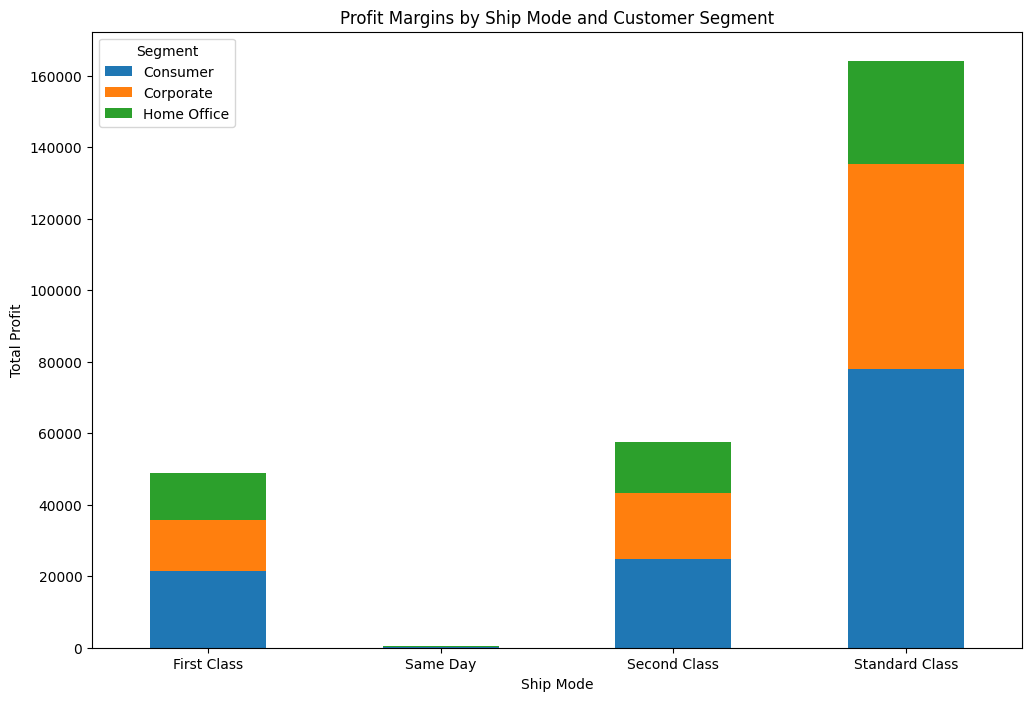

In [ ]:
profit_by_shipmode_segment = df.groupby(['Ship Mode', 'Segment'])['Profit'].sum().unstack()
profit_by_shipmode_segment.plot(kind='bar', stacked=True, title='Profit Margins by Ship Mode and Customer Segment',figsize=(12, 8))
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.savefig('10.png', dpi=600)
plt.show()

## **11) How long does it take to process orders for different product categories?**

In [ ]:
# Ensure 'Order Date' and 'Ship Date' are converted to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')  # 'coerce' sets invalid entries to NaT
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')  # Ditto for 'Ship Date'

# Check if there are any NaT (Not-a-Time) values
invalid_order_dates = df[df['Order Date'].isnull()]
invalid_ship_dates = df[df['Ship Date'].isnull()]

print("Invalid 'Order Date' count:", len(invalid_order_dates))
print("Invalid 'Ship Date' count:", len(invalid_ship_dates))

Invalid 'Order Date' count: 0
Invalid 'Ship Date' count: 0


In [ ]:
# Calculate 'Processing Time' in days
df['Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Check if 'Processing Time' has any invalid values
invalid_processing_time = df[df['Processing Time'].isnull()]

# Drop invalid rows or replace with a default value if needed
if not invalid_processing_time.empty:
    print("Warning: Some rows have invalid 'Processing Time'. They will be excluded.")
    df = df.dropna(subset=['Processing Time'])

<ipython-input-78-1f409f73a0a5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=processing_time_by_category.index, y=processing_time_by_category.values, width=0.4,palette= custom_colors)


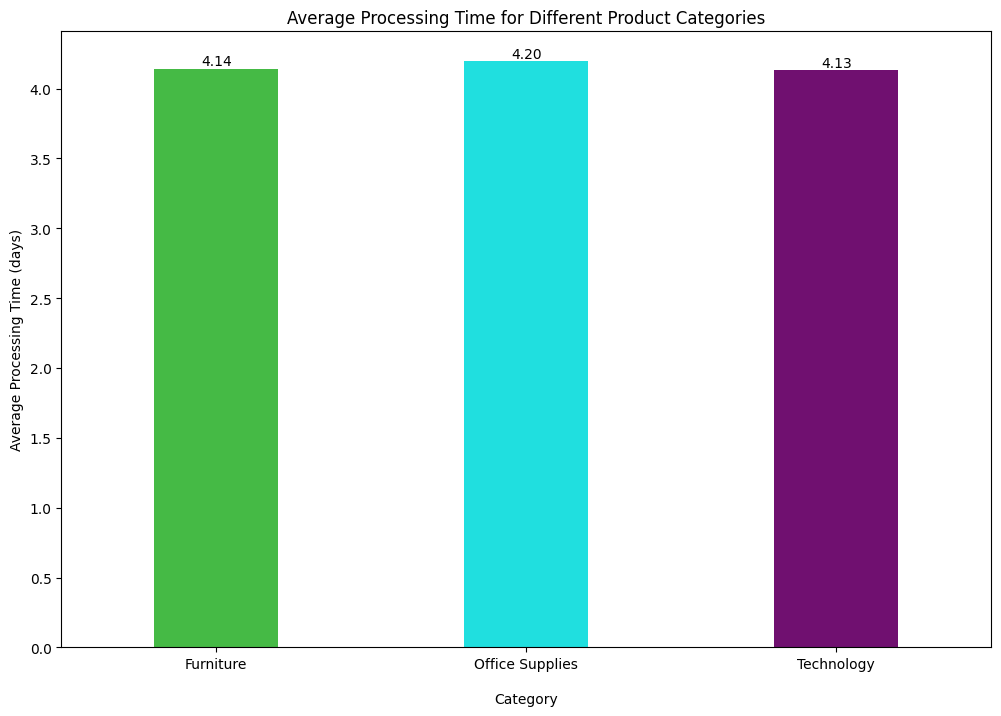

In [ ]:
# Group by 'Category' and get the average processing time
processing_time_by_category = df.groupby('Category')['Processing Time'].mean()

# Create a bar plot
plt.figure(figsize=(12, 8))
custom_colors = ["Limegreen", "Aqua", "Purple"]
bar_plot = sns.barplot(x=processing_time_by_category.index, y=processing_time_by_category.values, width=0.4,palette= custom_colors)

# Add exact numbers on top of each bar
for i, val in enumerate(processing_time_by_category.values):
    plt.text(i, val + 0, f'{val:.2f}', ha='center', va='bottom')  # +0.2 offsets to avoid overlap with the bar

plt.title('Average Processing Time for Different Product Categories')
plt.xlabel('Category',labelpad=15)
plt.ylabel('Average Processing Time (days)')
plt.savefig('11.png', dpi=600)
plt.show()

## **12) How do discounts affect overall profit?**

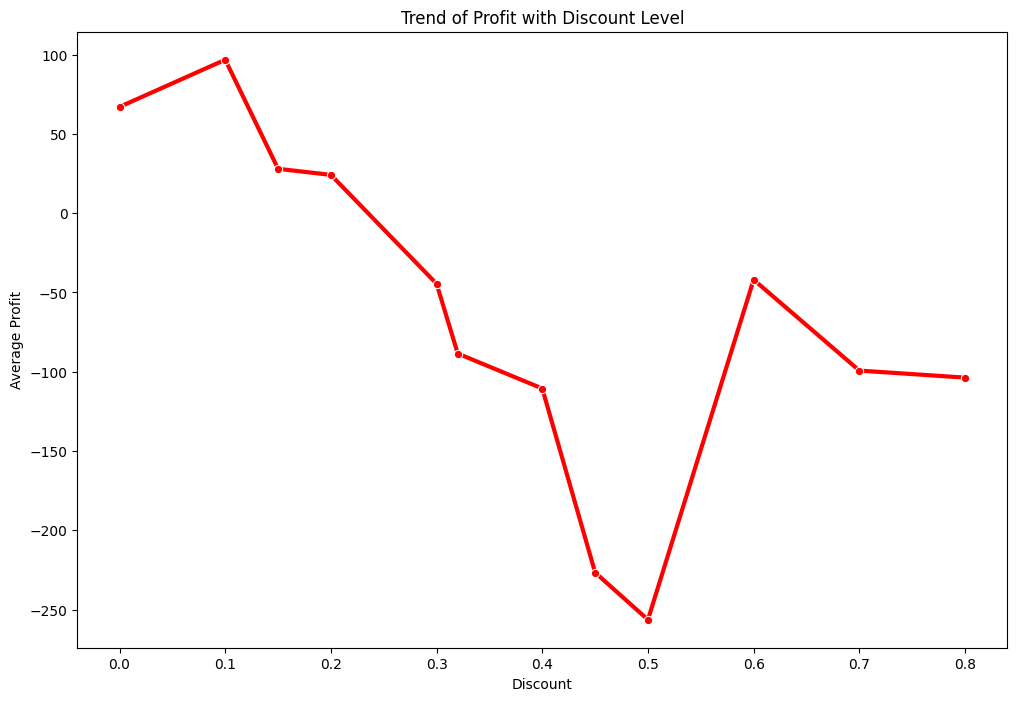

In [ ]:
# Create a line plot to show how profit changes with discount level
plt.figure(figsize=(12, 8))
colour = ['Red']
profit_by_discount = df.groupby('Discount')['Profit'].mean().reset_index()
sns.lineplot(x='Discount', y='Profit', data=profit_by_discount, marker='o', linewidth=3, color = 'Red' )  # Add marker for emphasis
plt.title('Trend of Profit with Discount Level')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.savefig('12.png', dpi=600)
plt.show()

## **13) Can we visualise the relationship between product sales and profitability for different product categories?**

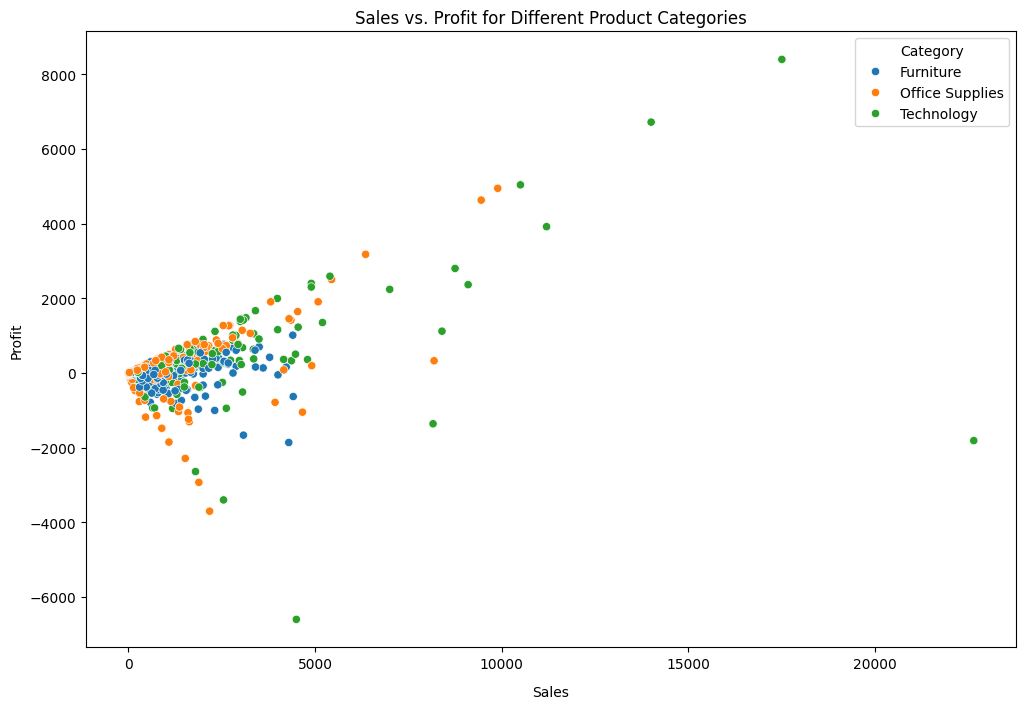

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Sales', y='Profit', hue='Category', data=df)
plt.title('Sales vs. Profit for Different Product Categories')
plt.xlabel('Sales',labelpad=10 )
plt.ylabel('Profit')
plt.savefig('13.png', dpi=600)
plt.show()

## **14) What is the distribution of order quantities for products in the dataset?**

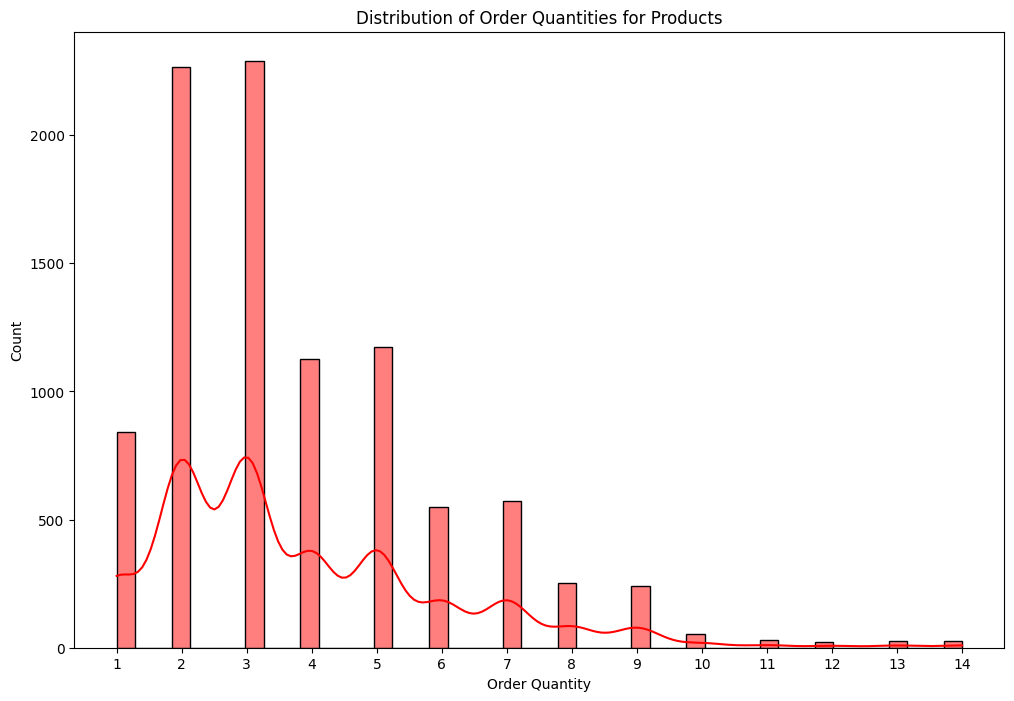

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Quantity'], kde=True, color = 'Red')
plt.title('Distribution of Order Quantities for Products')
unique_quantities = sorted(df['Quantity'].unique())
plt.xticks(unique_quantities)
plt.xlabel('Order Quantity')
plt.savefig('14.png', dpi=600)
plt.show()

## **15) How do the profit distributions vary across different product categories?**

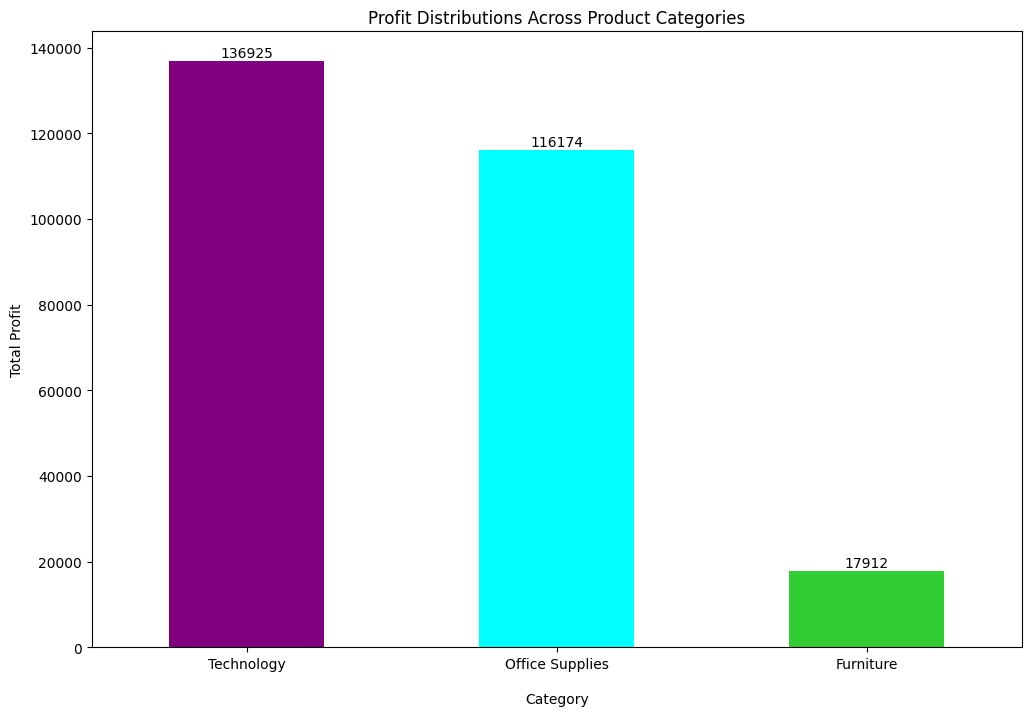

In [ ]:
profit_by_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

for i, val in enumerate(profit_by_category):
    plt.text(i, val + 80, f'{val:.0f}', ha='center',va='bottom')

profit_by_category.plot(kind='bar', title='Profit Distributions Across Product Categories', figsize=(12, 8), color = ["Purple", "Aqua" ,"Limegreen"])
plt.ylabel('Total Profit')
plt.xlabel('Category',labelpad=15)
plt.xticks(rotation=0)
plt.savefig('15.png', dpi=600)
plt.show()

## **16) Can we compare the shipping time distributions for different shipping modes?**

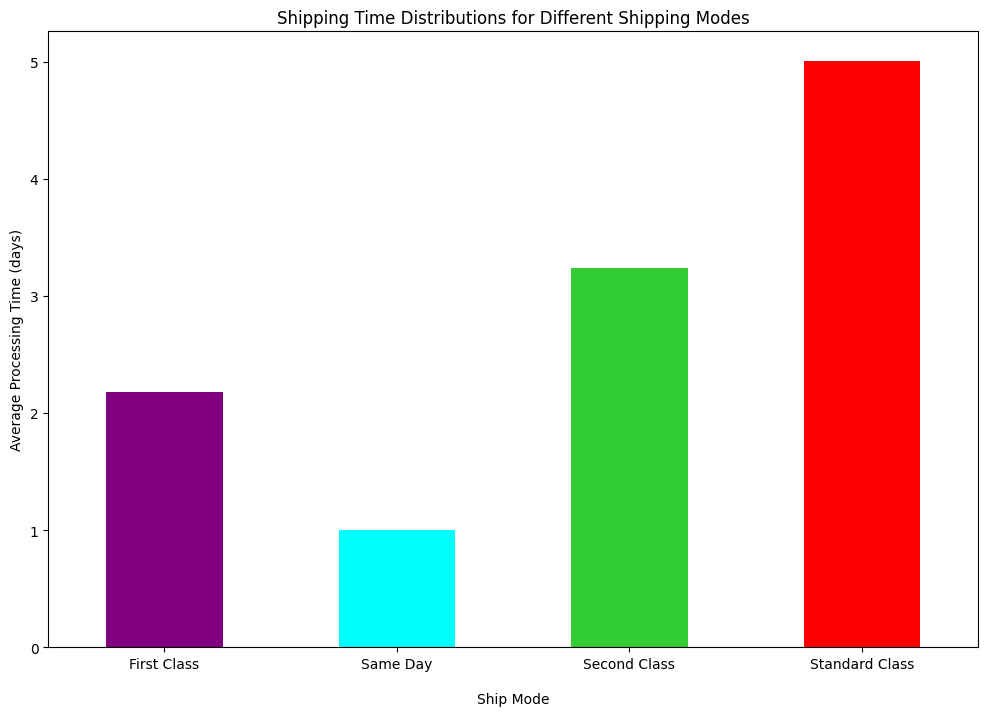

In [ ]:
shipping_time_by_mode = df.groupby('Ship Mode')['Processing Time'].mean()
shipping_time_by_mode.plot(kind='bar', title='Shipping Time Distributions for Different Shipping Modes',figsize=(12, 8), color = ["Purple", "Aqua" ,"Limegreen","Red"])
plt.ylabel('Average Processing Time (days)')
plt.xlabel('Ship Mode',labelpad=15)
plt.xticks(rotation=0)
plt.savefig('16.png', dpi=600)
plt.show()

## **17) What is the monthly trend in the number of orders shipped?**

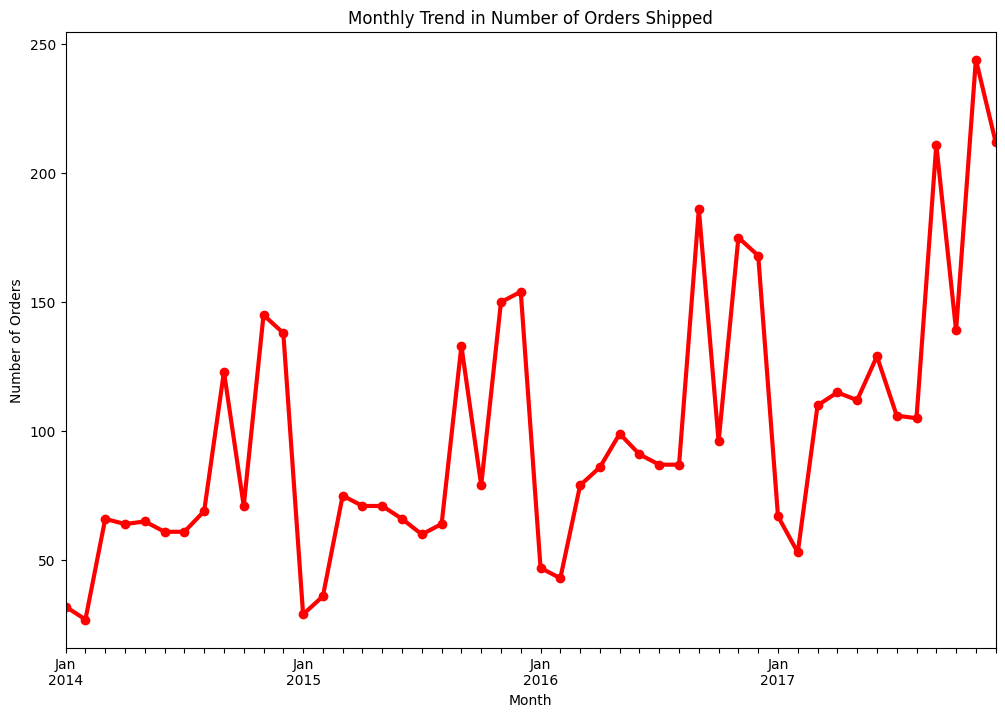

In [ ]:
monthly_orders = df.groupby('Month')['Order ID'].nunique()
monthly_orders.plot(kind='line', title='Monthly Trend in Number of Orders Shipped', figsize=(12, 8),marker='o', linewidth=3, color = 'Red')
plt.xlabel('Month')
unique_quantities = sorted(df['Month'].unique())
plt.xticks(unique_quantities)
plt.ylabel('Number of Orders')
plt.savefig('17.png', dpi=600)
plt.show()

## **18) How do different customer segments perform in terms of sales and discount rates?**

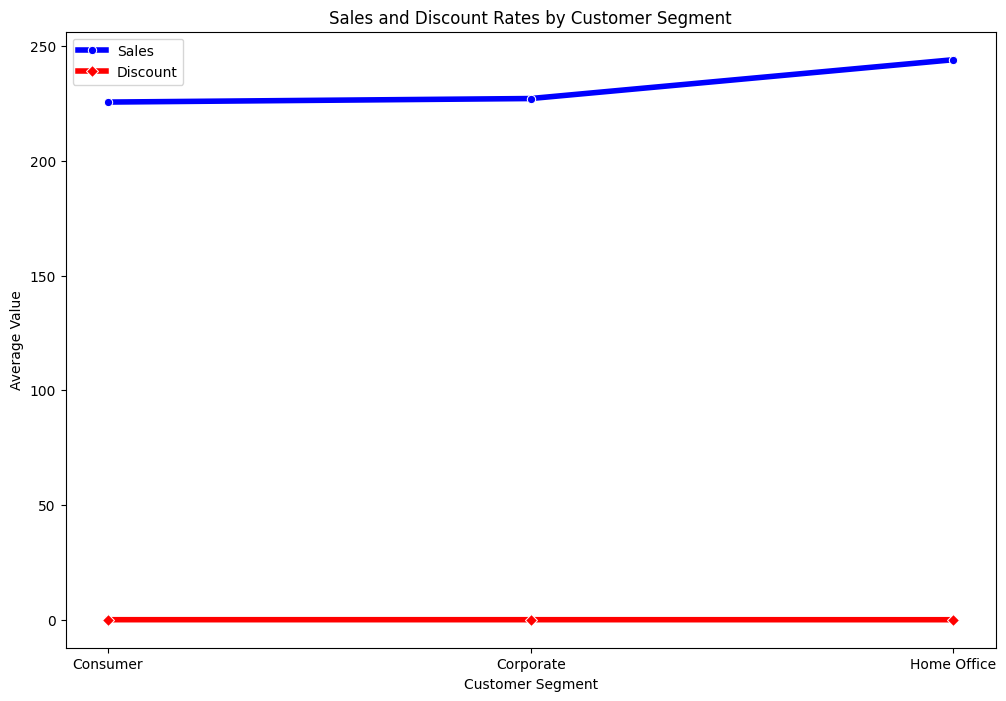

In [ ]:
# Group by 'Segment' to get average sales and discount rates
segment_performance = df.groupby('Segment')[['Sales', 'Discount']].mean().reset_index()

# Create a figure for the line plot
plt.figure(figsize=(12, 8))

# Plot lines for Sales and Discount rates with different markers
sns.lineplot(x='Segment', y='Sales', data=segment_performance, marker='o', linewidth=4, label='Sales', color='b')  # Circle marker for Sales
sns.lineplot(x='Segment', y='Discount', data=segment_performance, marker='D', linewidth=4, label='Discount', color='r')  # Cross marker for Discount

# Add a title and axis labels
plt.title('Sales and Discount Rates by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Value')

# Set the x-axis ticks and rotation
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal

# Display the legend to differentiate between Sales and Discount lines
plt.legend()
plt.savefig('18.png', dpi=600)
plt.show()

## **19) What are the sales and profit trends across different product subcategories and regions in the Superstore dataset?**



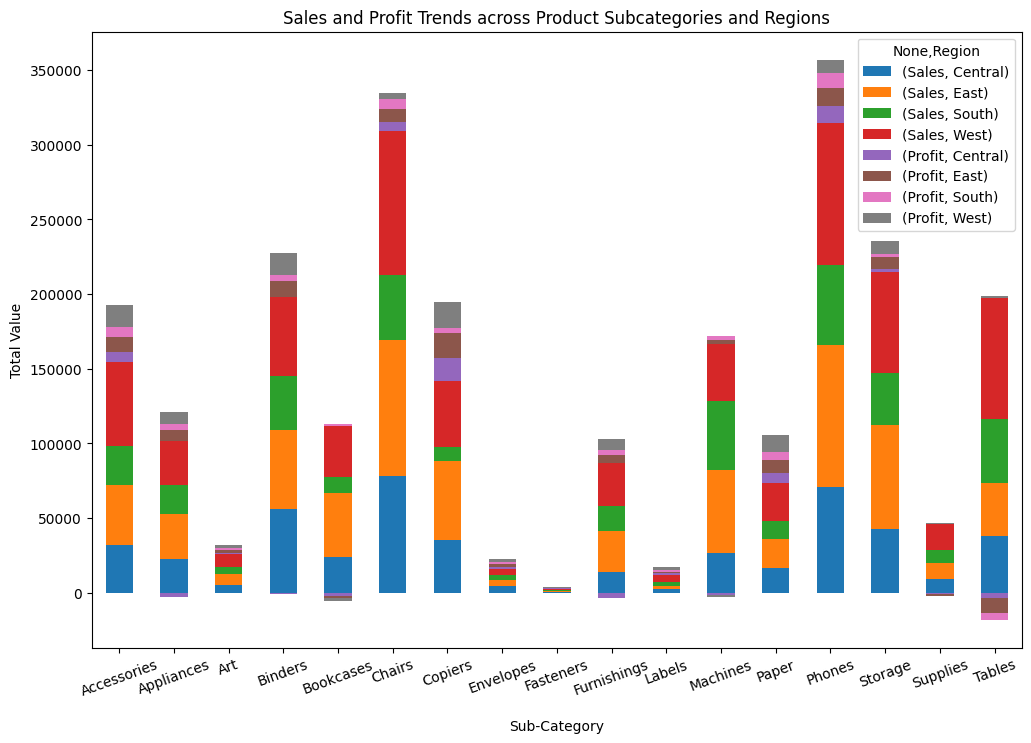

In [ ]:
sales_and_profit_by_subcategory_region = df.groupby(['Sub-Category', 'Region'])[['Sales', 'Profit']].sum().unstack()
sales_and_profit_by_subcategory_region.plot(kind='bar', stacked=True, title='Sales and Profit Trends across Product Subcategories and Regions',figsize=(12, 8))
plt.ylabel('Total Value')
plt.xlabel('Sub-Category',labelpad=15)
plt.xticks(rotation=20)
plt.savefig('19.png', dpi=600)
plt.show()

## **20) What is the average delivery duration for different regions and ship modes?**

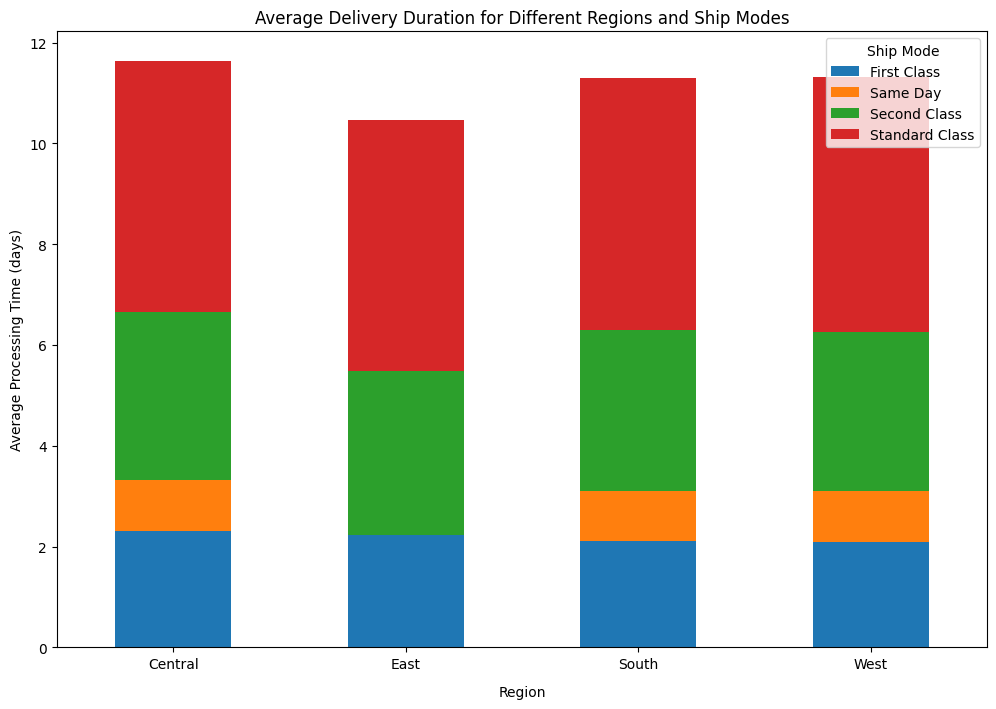

In [ ]:
delivery_duration_by_region_shipmode = df.groupby(['Region', 'Ship Mode'])['Processing Time'].mean().unstack()
delivery_duration_by_region_shipmode.plot(kind='bar', stacked=True, title='Average Delivery Duration for Different Regions and Ship Modes',figsize=(12, 8))
plt.ylabel('Average Processing Time (days)')
plt.xlabel('Region',labelpad=10)
plt.xticks(rotation=0)
plt.savefig('20.png', dpi=600)
plt.show()

## **21) How has the average order quantity changed over the years for various product categories?**

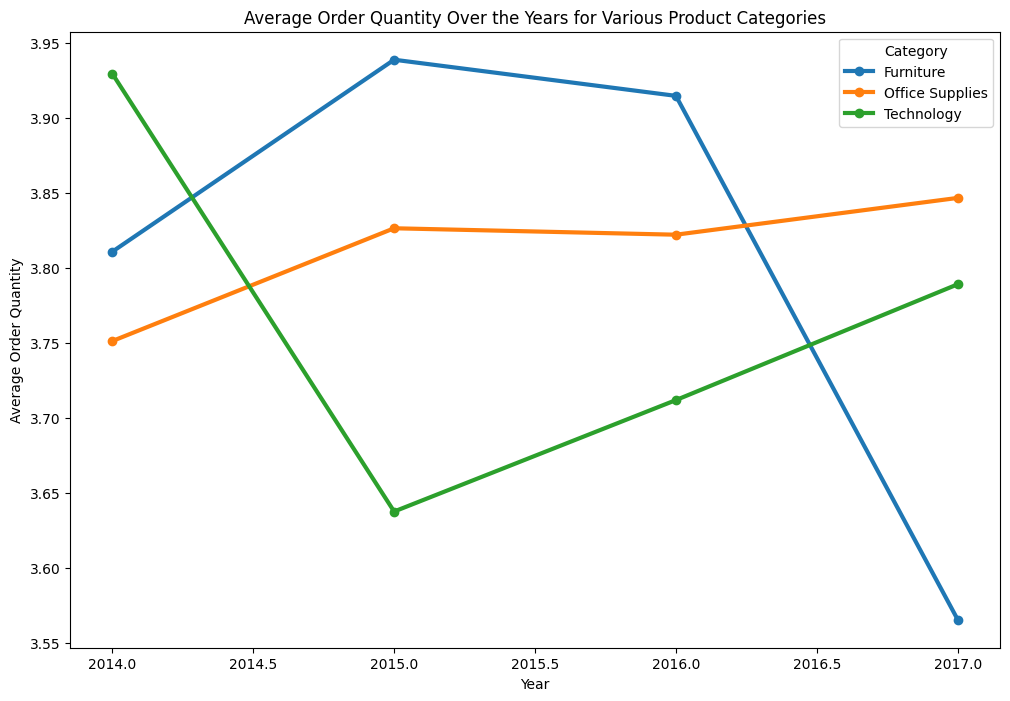

In [ ]:
df['Year'] = df['Order Date'].dt.year
quantity_over_years = df.groupby(['Year', 'Category'])['Quantity'].mean().unstack()
quantity_over_years.plot(kind='line', title='Average Order Quantity Over the Years for Various Product Categories',figsize=(12, 8), marker='o', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Average Order Quantity')
plt.savefig('21.png', dpi=600)
plt.show()

## **22) Can we visualise the correlation between discount rates and order quantities for different customer segments?**

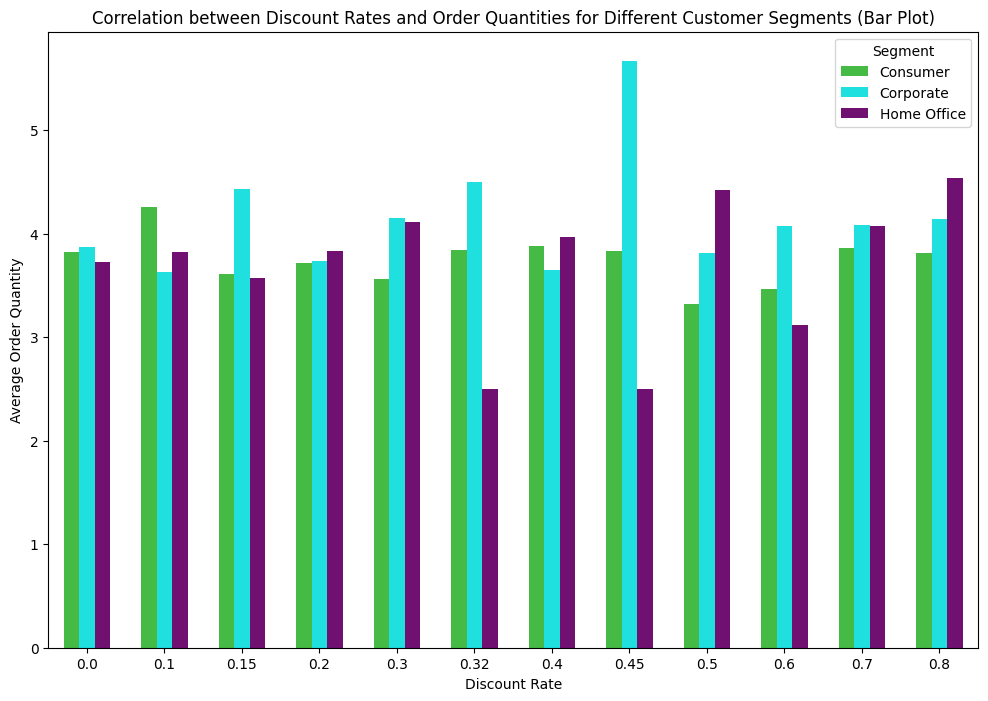

In [ ]:
discount_vs_quantity_by_segment = df.groupby(['Segment', 'Discount'])['Quantity'].mean().reset_index()

custom_colors = ["Limegreen", "Aqua", "Purple"]

plt.figure(figsize=(12, 8))
sns.barplot(x='Discount', y='Quantity', hue='Segment', data=discount_vs_quantity_by_segment,width=0.6, palette= custom_colors )

# Set title and labels
plt.title('Correlation between Discount Rates and Order Quantities for Different Customer Segments (Bar Plot)')
plt.xlabel('Discount Rate')
plt.ylabel('Average Order Quantity')
plt.savefig('22.png', dpi=600)
plt.show()

## **23) What is the proportion of orders returned in each region within the Superstore dataset?**

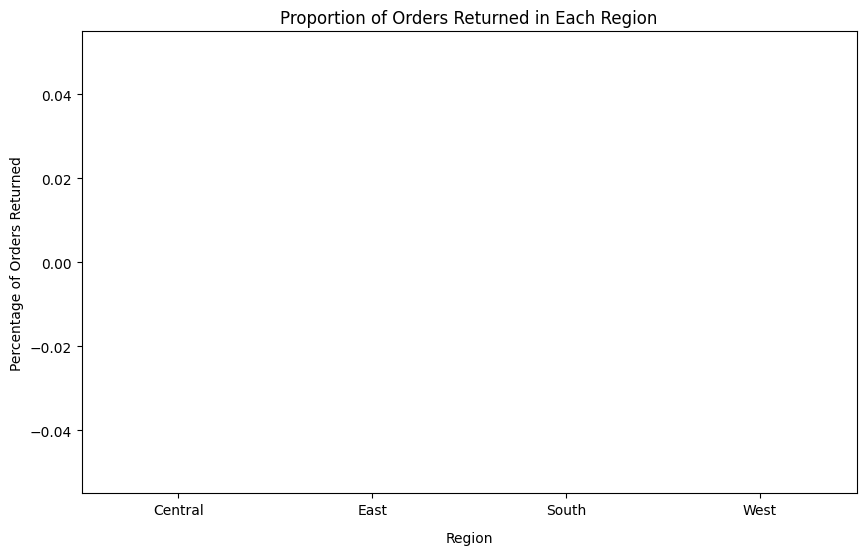

In [ ]:
# Ensure 'Order Date' and 'Ship Date' are properly formatted as datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Step 1: Identify returned orders
# Assuming 'Ship Date > Order Date' is the condition to identify invalid shipments (i.e., returned orders)
df['Returned'] = df['Ship Date'] < df['Order Date']

# Step 2: Calculate total orders by region
total_orders_by_region = df.groupby('Region')['Order ID'].count()

# Step 3: Calculate returned orders by region
returned_orders_by_region = df[df['Returned']].groupby('Region')['Order ID'].count()

# Step 4: Calculate the proportion of returned orders by region
returns_proportion = (returned_orders_by_region / total_orders_by_region) * 100  # Convert to percentage

# Plot the proportion of returned orders for each region
returns_proportion.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Proportion of Orders Returned in Each Region')
plt.xlabel('Region',labelpad = 10)
plt.ylabel('Percentage of Orders Returned')
plt.xticks(rotation=0)
plt.savefig('23.png', dpi=600)
plt.show()


# **Summary of Insights for Low or Zero Returns**
1. Operational Efficiency:
A low or zero return rate indicates efficient order processing and shipping. This efficiency can lead to reduced costs related to handling returns, such as shipping fees, restocking, and customer service. Lower costs contribute to increased profitability and improved business margins.

2. High Customer Satisfaction:
Minimal returns suggest high customer satisfaction, indicating that products meet customer expectations and are delivered on time. This positive customer experience can lead to increased loyalty, repeat business, and positive word-of-mouth referrals, driving business growth.

3. Quality Assurance and Supplier Reliability:
A low return rate can be a sign of robust quality control and reliable suppliers, which reduces defects and errors. This quality assurance builds trust with customers and minimizes disruptions to business operations, leading to a stable and predictable supply chain.

# **Impact on Business**
1. Cost Savings and Profitability: Reduced costs from handling returns contribute to increased profitability, allowing the business to allocate resources to other growth areas.
2. Customer Loyalty and Retention: High customer satisfaction leads to repeat business and positive customer relationships, fostering long-term loyalty.
3. Competitive Advantage: A low return rate can be a competitive advantage, indicating a reliable and efficient business that can attract and retain customers over time.

## **24) Can you compare the profit of different products for different subcategories?**

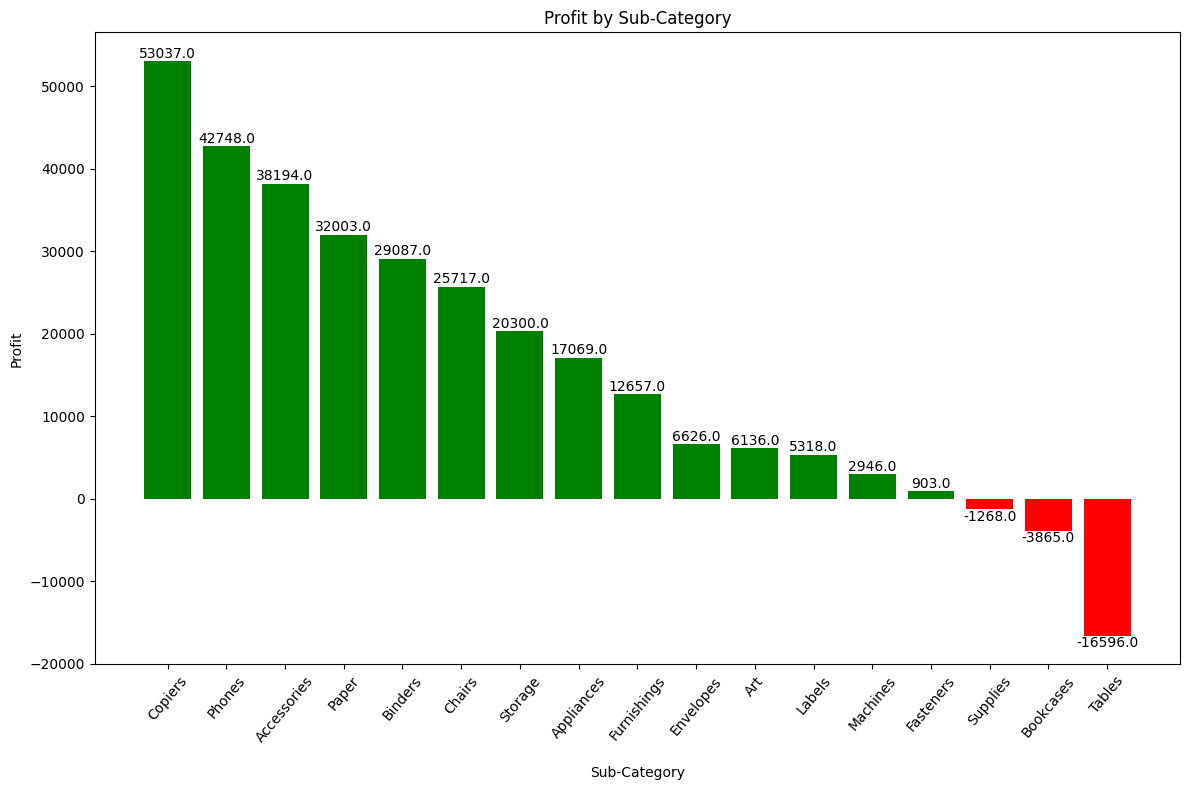

In [ ]:
# Calculate the sum of profit for each sub-category
profit_by_subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index()

# Sort the sub-categories by profit
sorted_profit = profit_by_subcategory.sort_values('Profit', ascending=False)

# Custom colors for each bar
custom_colors = ['green'] * 14 + ['red'] * 3  # First 14 bars green, last 3 red

# Create a bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_profit['Sub-Category'], sorted_profit['Profit'], color=custom_colors)

# Add exact numbers on top of each bar, except for the last 3
for i, bar in enumerate(bars):
    yval = bar.get_height()  # Get the height of the bar
    if i < len(bars) - 3:  # For all bars except the last three
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, round(yval, 0), ha='center', va='bottom')  # Above the bar
    else:  # For the last three bars
        plt.text(bar.get_x() + bar.get_width() / 2, yval - 100, round(yval, 0), ha='center', va='top')  # Below the top edge

# Set plot title and labels
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category', labelpad=15)
plt.ylabel('Profit')
plt.xticks(rotation=50)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.savefig('24.png', dpi=600)
# Show the plot
plt.show()

## **25) Which shipping mode is the most commonly used in the Sample Superstore dataset?**

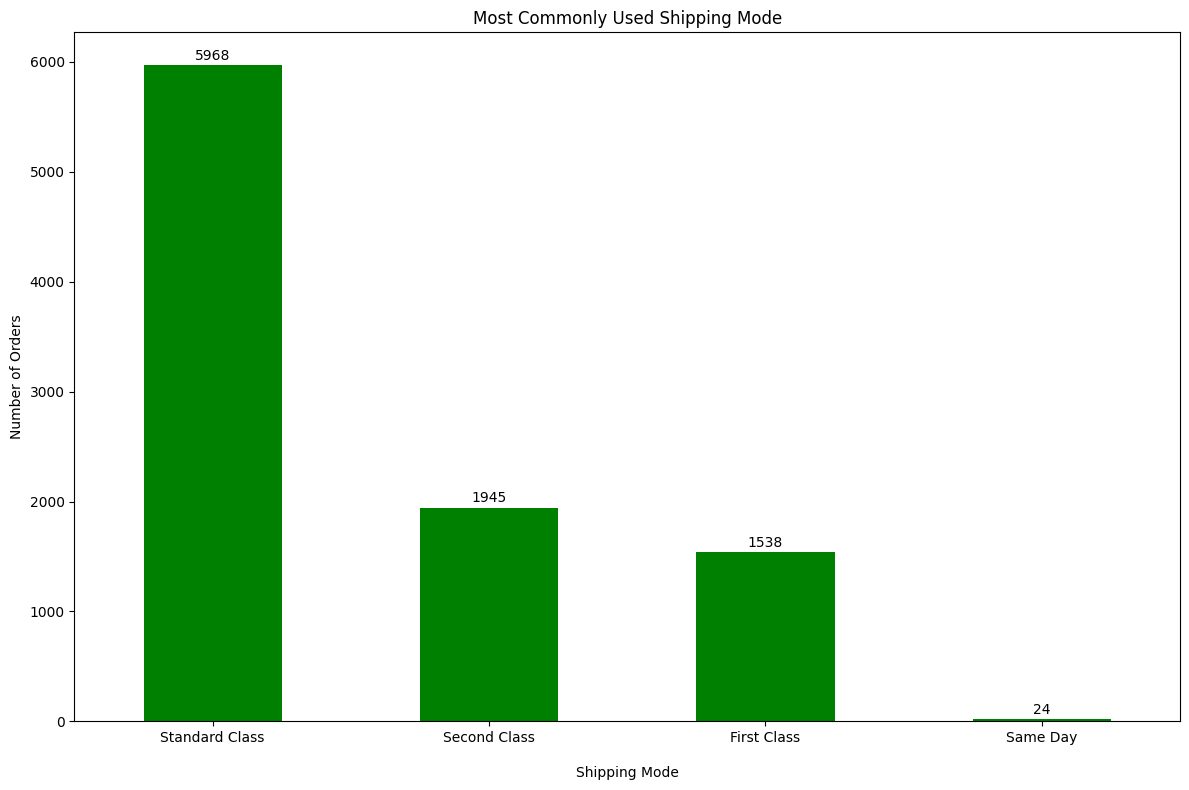

In [ ]:
# Calculate the count of orders for each 'Ship Mode'
ship_mode_usage = df['Ship Mode'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 8))
bars = ship_mode_usage.plot(kind='bar', color='green', title='Most Commonly Used Shipping Mode')

# Add exact numbers on top of each bar
for bar in bars.patches:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 20, round(yval, 0), ha='center', va='bottom')  # Position the text above the bar

# Set labels and title
plt.ylabel('Number of Orders')
plt.xlabel('Shipping Mode', labelpad=15)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()
plt.savefig('25.png', dpi=600)
# Show the plot
plt.show()

## **26) How does the sales performance of different regions evolve throughout the quarters of a year?**

<Figure size 1200x800 with 0 Axes>

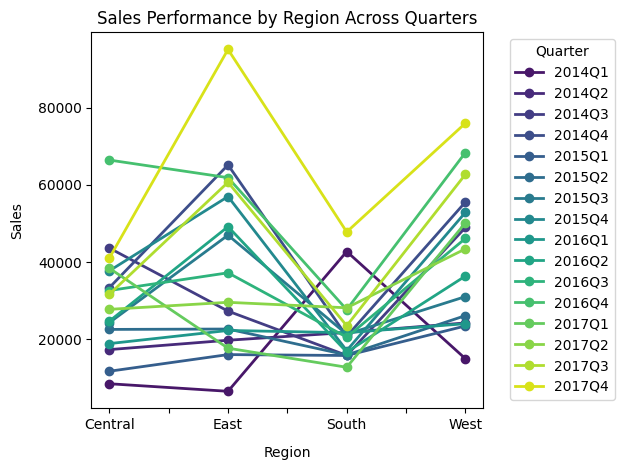

In [ ]:
# Ensure 'Order Date' is datetime and extract quarter
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Quarter'] = df['Order Date'].dt.to_period('Q')

# Group the data by 'Region' and 'Quarter', then sum up the sales
sales_performance = df.groupby(['Region', 'Quarter'])['Sales'].sum().unstack()

# Use a color palette with a gradient from light to dark
color_palette = sns.color_palette("viridis", len(sales_performance.columns))  # 'viridis' palette

# Plot the results with a gradient color scheme
plt.figure(figsize=(12, 8))
sales_performance.plot(kind='line', marker='o', color=color_palette, linewidth=2)

# Add title and axis labels
plt.title('Sales Performance by Region Across Quarters')
plt.xlabel('Region',labelpad=10 )
plt.ylabel('Sales',labelpad=10)

# Adjust the legend
plt.legend(title='Quarter', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
# Show the plot
plt.savefig('26.png', dpi=600)
plt.show()


## **27) What is the distribution of order priorities across different product categories?**

<Figure size 1200x800 with 0 Axes>

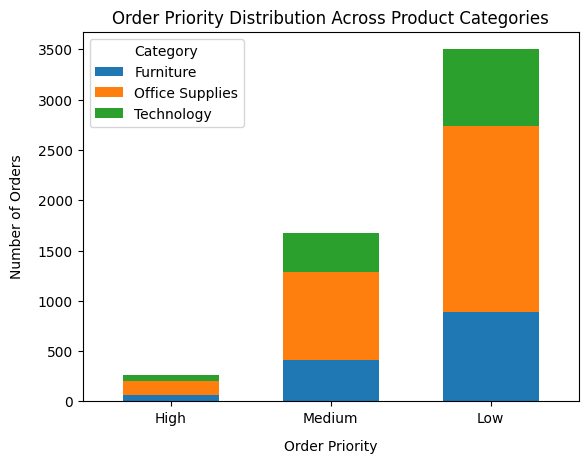

In [ ]:
# Convert 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Step 1: Define a custom "Order Priority" based on delivery time
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Classify priorities based on delivery time
df['Order Priority'] = pd.cut(df['Delivery Time'], bins=[0, 1, 3, 5], labels=['High', 'Medium', 'Low'])

# Step 2: Group by "Order Priority" and "Category"
order_priority_by_category = df.groupby(['Order Priority', 'Category'])['Order ID'].nunique().unstack()

# Step 3: Create a bar plot to visualize the distribution of order priorities across categories
plt.figure(figsize=(12, 8))
order_priority_by_category.plot(kind='bar', stacked=True, title='Order Priority Distribution Across Product Categories',width=0.6)
plt.ylabel('Number of Orders',labelpad=10)
plt.xlabel('Order Priority',labelpad=10)
plt.xticks(rotation=0)
plt.savefig('27.png', dpi=600)
plt.show()


## **28) What is the relationship between discounts and sales?**

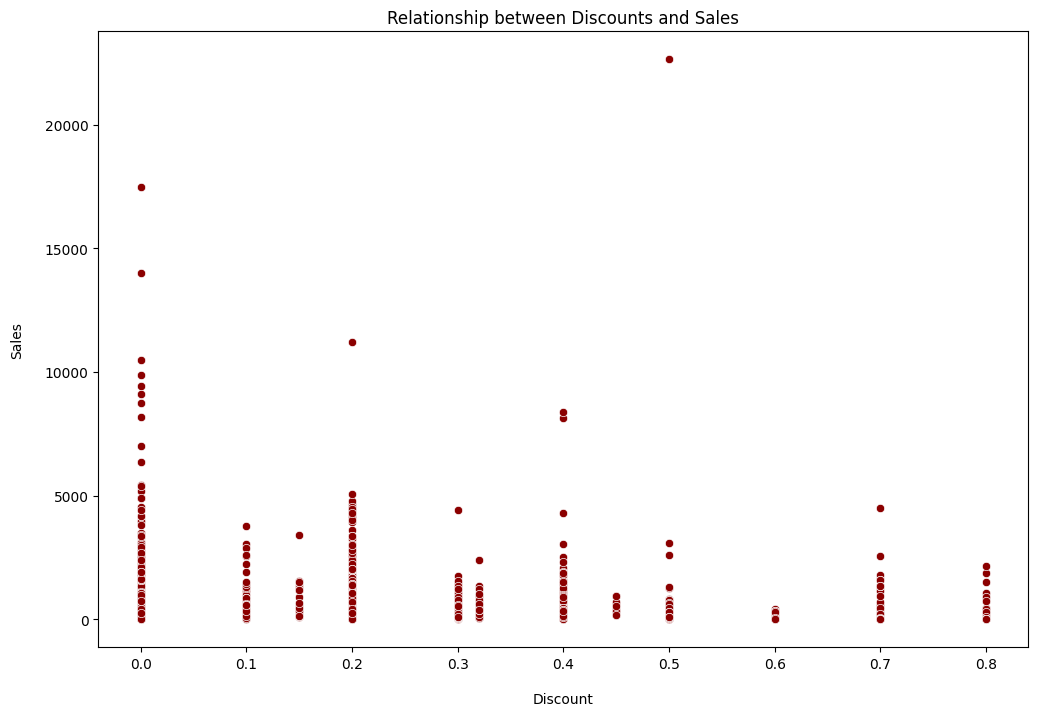

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Discount', y='Sales', data=df,color='darkred')
plt.title('Relationship between Discounts and Sales')
plt.xlabel('Discount',labelpad=15 )
plt.ylabel('Sales',labelpad=15)
plt.savefig('28.png', dpi=600)
plt.show()

## **29) How does the average order value differ between repeat customers and new customers?**

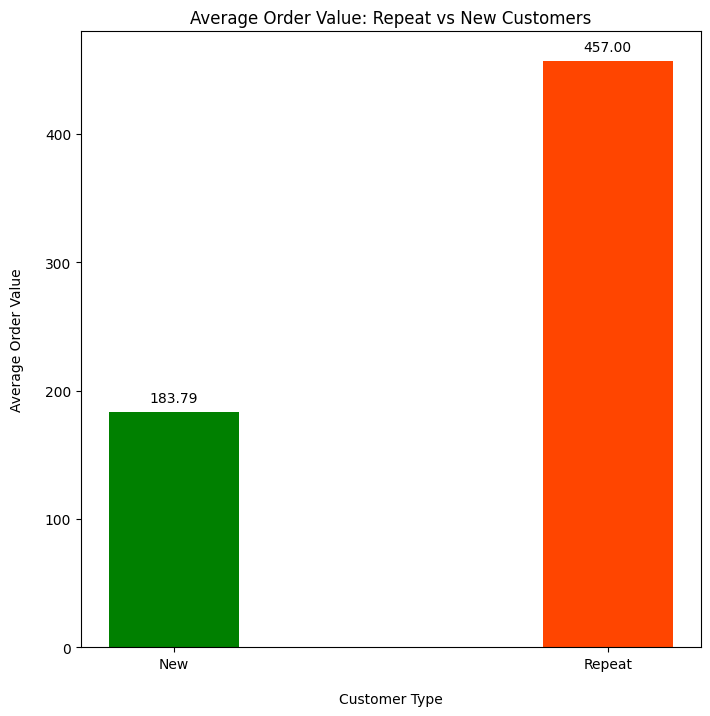

In [ ]:
# Step 1: Identify repeat customers
df['Repeat Customer'] = df.duplicated('Customer ID', keep=False)

# Step 2: Calculate the Average Order Value (AOV) for repeat and new customers
aov_data = df.groupby('Repeat Customer')['Sales'].sum() / df.groupby('Repeat Customer')['Order ID'].nunique()
aov_data = aov_data.reset_index()

# Step 3: Map boolean to 'Repeat' and 'New'
aov_data['Repeat Customer'] = aov_data['Repeat Customer'].map({True: 'Repeat', False: 'New'})

# Step 4: Create a bar plot
plt.figure(figsize=(8, 8))
bars = plt.bar(aov_data['Repeat Customer'], aov_data[0], color=['green', 'orangered'], width=0.3)

# Add exact numbers on top of each bar
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, f'{yval:.2f}', ha='center', va='bottom')  # Add text above the bar

# Set plot title and axis labels
plt.title('Average Order Value: Repeat vs New Customers')
plt.xlabel('Customer Type', labelpad=15)
plt.ylabel('Average Order Value', labelpad=15)

plt.savefig('29.png', dpi=600)
plt.show()

## **30) What is the geographical distribution of returns and its impact on overall profitability?**

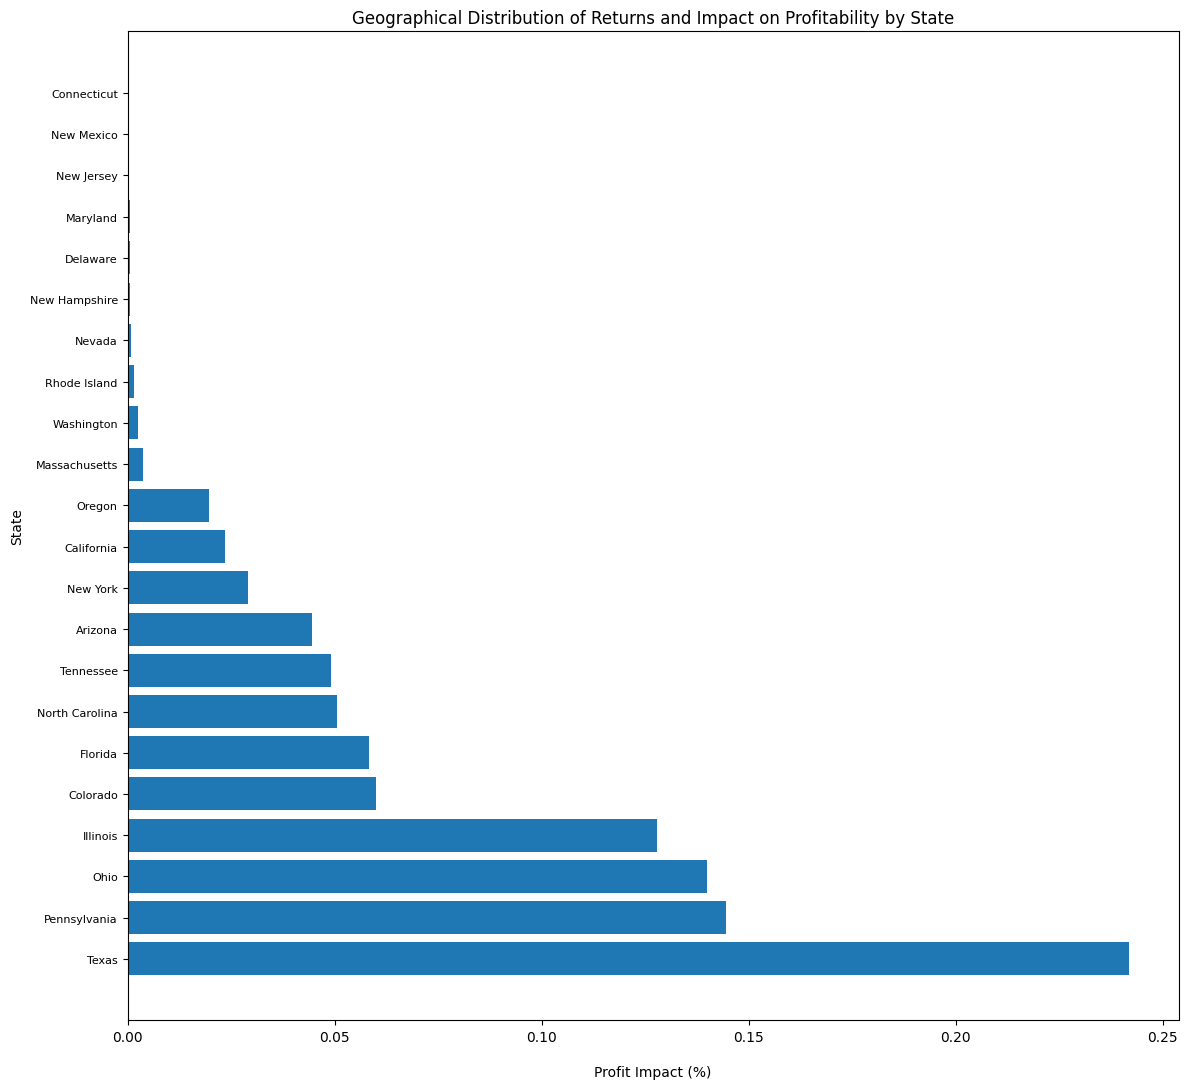

In [ ]:
# Assuming 'Profit' column exists and negative profit indicates returns
returns_df = df[df['Profit'] < 0]

# Group by State and calculate the sum of negative profit
geo_returns = returns_df.groupby('State').agg({'Profit': 'sum'}).reset_index()

# Calculate the impact on overall profitability
total_negative_profit = geo_returns['Profit'].sum()
geo_returns['Profit_Impact'] = geo_returns['Profit'] / total_negative_profit

# Sort the data by Profit Impact
geo_returns_sorted = geo_returns.sort_values('Profit_Impact', ascending=False)

# Set up the matplotlib figure with increased height for better label visibility
plt.figure(figsize=(12, len(geo_returns_sorted['State']) * 0.5))

# Plot a horizontal bar chart
plt.barh(geo_returns_sorted['State'], geo_returns_sorted['Profit_Impact'])

# Customize the plot with labels and title
plt.xlabel('Profit Impact (%)',labelpad=15)
plt.ylabel('State')

# Rotate the state names for better visibility
plt.yticks(rotation=0, fontsize=8)  # Adjust fontsize as needed

plt.title('Geographical Distribution of Returns and Impact on Profitability by State')

# Show the plot
plt.tight_layout()
plt.savefig('30.png', dpi=600)
plt.show()



---



---



<ipython-input-44-01721a43d1d8>:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='YearMonth', y='Sales', data=limited_data, scale='width')


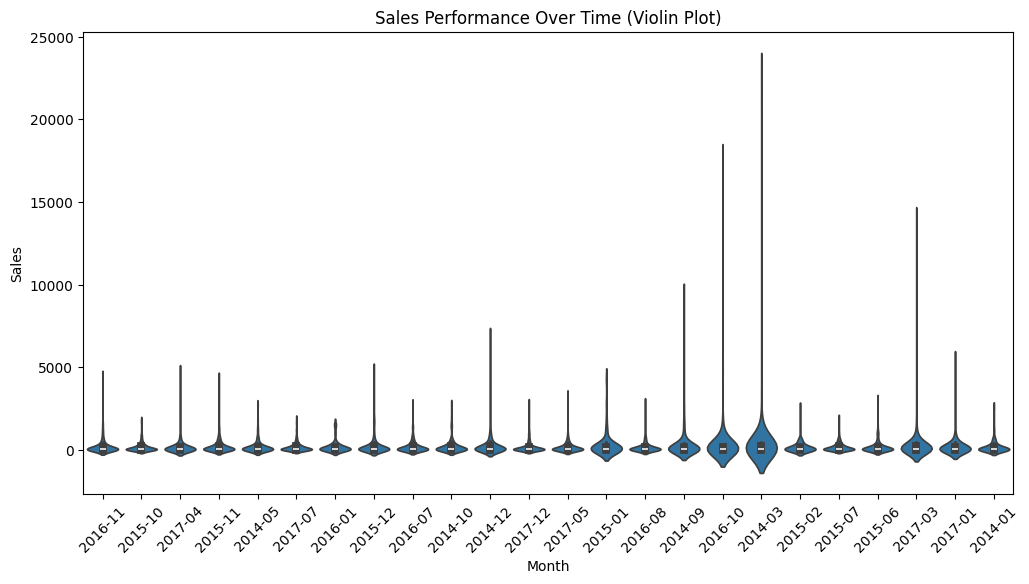

In [ ]:
# Limit to every other month to reduce label overlap
limited_data = df[df['YearMonth'].isin(df['YearMonth'].unique()[::2])]

plt.figure(figsize=(12, 6))
sns.violinplot(x='YearMonth', y='Sales', data=limited_data, scale='width')
plt.title('Sales Performance Over Time (Violin Plot)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlapping
plt.show()

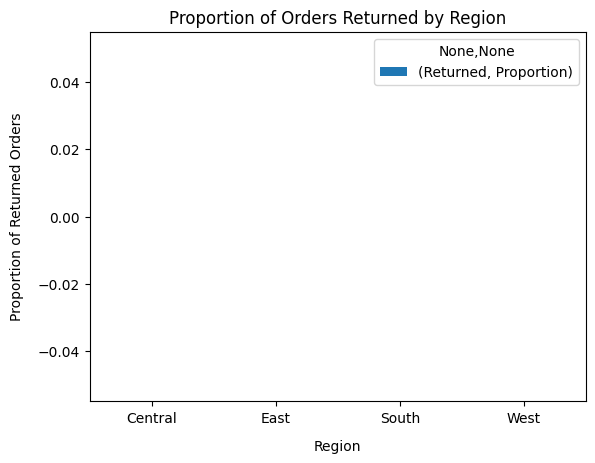

In [ ]:
# Convert 'Returned' into a binary representation
df['Returned'] = df['Returned'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate the total number of orders and the number of returned orders by region
region_data = df.groupby('Region').agg({'Returned': ['sum', 'count']})

# Calculate the proportion of returned orders
region_data['Returned', 'Proportion'] = region_data['Returned', 'sum'] / region_data['Returned', 'count']

# Reset index to make 'Region' a column again
region_data.reset_index(inplace=True)

# Plotting
fig, ax = plt.subplots()
region_data.plot(kind='bar', x='Region', y=('Returned', 'Proportion'), ax=ax)
ax.set_title('Proportion of Orders Returned by Region')
ax.set_xlabel('Region',labelpad=10)
ax.set_ylabel('Proportion of Returned Orders',labelpad=10)
plt.xticks(rotation=0)
plt.savefig('23.png', dpi=600)
plt.show()
